In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2025_ratings.html")
df_2025 = df[0]
df_2025.to_csv("df_2025.csv")
df_2025 = pd.read_csv("df_2025.csv")
df_2025.columns = df_2025.iloc[0]
df_2025 = df_2025[1:]
del df_2025[df_2025.columns[0]]
df_2025.reset_index(drop=True, inplace=True)
df_2025 = df_2025.drop(columns = ['Conf', 'Div', 'MOV', 'ORtg', 'DRtg', 'NRtg'])
df_2025

,Rk,Team,W,L,W/L%,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,1,Oklahoma City Thunder,49,11,0.817,12.38,119.34,107.05,12.3
1,2,Cleveland Cavaliers,50,10,0.833,10.59,122.89,112.26,10.63
2,3,Boston Celtics,43,18,0.705,8.27,119.89,111.26,8.62
3,4,Memphis Grizzlies,38,22,0.633,5.98,118.15,112.46,5.7
4,5,Denver Nuggets,39,22,0.639,4.75,119.96,115.34,4.62
5,6,Houston Rockets,37,23,0.617,4.51,113.83,109.55,4.28
6,7,Minnesota Timberwolves,33,29,0.532,4.06,114.98,110.8,4.18
7,8,New York Knicks,40,20,0.667,3.96,119.76,115.78,3.98
8,9,Golden State Warriors,32,28,0.533,2.27,114.27,112.01,2.26
9,10,Los Angeles Clippers,32,28,0.533,2.13,112.13,109.98,2.15


In [3]:
df = pd.read_html("https://www.nbastuffer.com/2024-2025-nba-team-stats/")
df_advStats = df[0]
df_advStats.to_csv("df_advStats.csv")
df_ad = pd.read_csv("df_advStats.csv")
df_advStats = df_advStats.drop(columns = ['STRK', 'CONF', 'DIVISION', 'GP', 'RANK', 'W', 'L'])
df_2025['Team'] = df_2025['Team'].astype(str)
# Adds the team names to the Table
team = df_2025['Team'].sort_values().reset_index(drop=True)
df_advStats['TEAM'] = team
df_advStats

,TEAM,PPG,oPPG,pDIFF,PACE,oEFF,dEFF,eDIFF,SoS,rSoS,SAR,CONS,A4F,WIN%,eWIN%,pWIN%,ACH
0,Atlanta Hawks,116.6,119.5,-2.9,103.2,112.3,115.0,-2.7,0.34,-1.69,-2.36,12.5,0.257,0.450,0.415,0.405,0.035
1,Boston Celtics,116.8,108.2,8.6,96.7,119.7,110.9,8.8,-0.53,-2.49,8.27,15.8,0.186,0.705,0.712,0.783,-0.007
2,Brooklyn Nets,104.8,111.3,-6.5,96.2,108.4,115.1,-6.7,0.52,-0.44,-6.18,14.7,0.294,0.350,0.324,0.286,0.026
3,Charlotte Hornets,105.2,112.8,-7.6,97.7,107.1,114.8,-7.7,-0.27,1.06,-7.97,12.9,0.179,0.237,0.275,0.250,-0.038
4,Chicago Bulls,116.5,120.4,-3.9,102.6,112.9,116.8,-3.9,0.31,0.38,-3.59,14.9,0.229,0.393,0.397,0.372,-0.004
5,Cleveland Cavaliers,123.1,111.6,11.5,99.9,122.9,111.5,11.4,-2.11,-0.02,9.29,13.3,0.256,0.833,0.805,0.879,0.028
6,Dallas Mavericks,115.0,113.4,1.6,99.0,115.8,114.2,1.6,-0.64,0.42,0.96,14.4,0.224,0.525,0.544,0.553,-0.019
7,Denver Nuggets,121.1,116.0,5.1,100.2,120.0,115.0,5.0,-0.41,0.94,4.59,15.2,0.204,0.639,0.629,0.668,0.010
8,Detroit Pistons,114.4,113.0,1.4,99.7,114.0,112.7,1.3,-0.49,0.29,0.81,13.1,0.310,0.557,0.540,0.546,0.017
9,Golden State Warriors,113.0,111.4,1.6,99.1,113.9,112.2,1.7,0.08,-0.24,1.78,17.1,0.233,0.533,0.540,0.553,-0.007


In [4]:
df_temp = df_advStats.copy()
df_temp = df_temp.drop(columns = ['TEAM'])
df_temp

,PPG,oPPG,pDIFF,PACE,oEFF,dEFF,eDIFF,SoS,rSoS,SAR,CONS,A4F,WIN%,eWIN%,pWIN%,ACH
0,116.6,119.5,-2.9,103.2,112.3,115.0,-2.7,0.34,-1.69,-2.36,12.5,0.257,0.450,0.415,0.405,0.035
1,116.8,108.2,8.6,96.7,119.7,110.9,8.8,-0.53,-2.49,8.27,15.8,0.186,0.705,0.712,0.783,-0.007
2,104.8,111.3,-6.5,96.2,108.4,115.1,-6.7,0.52,-0.44,-6.18,14.7,0.294,0.350,0.324,0.286,0.026
3,105.2,112.8,-7.6,97.7,107.1,114.8,-7.7,-0.27,1.06,-7.97,12.9,0.179,0.237,0.275,0.250,-0.038
4,116.5,120.4,-3.9,102.6,112.9,116.8,-3.9,0.31,0.38,-3.59,14.9,0.229,0.393,0.397,0.372,-0.004
5,123.1,111.6,11.5,99.9,122.9,111.5,11.4,-2.11,-0.02,9.29,13.3,0.256,0.833,0.805,0.879,0.028
6,115.0,113.4,1.6,99.0,115.8,114.2,1.6,-0.64,0.42,0.96,14.4,0.224,0.525,0.544,0.553,-0.019
7,121.1,116.0,5.1,100.2,120.0,115.0,5.0,-0.41,0.94,4.59,15.2,0.204,0.639,0.629,0.668,0.010
8,114.4,113.0,1.4,99.7,114.0,112.7,1.3,-0.49,0.29,0.81,13.1,0.310,0.557,0.540,0.546,0.017
9,113.0,111.4,1.6,99.1,113.9,112.2,1.7,0.08,-0.24,1.78,17.1,0.233,0.533,0.540,0.553,-0.007


In [5]:
scaler = MinMaxScaler(feature_range=(-1, 1))
df_temp = scaler.fit_transform(df_temp)
df_temp = pd.DataFrame(df_temp)
df_temp.columns = ['PPG', 'oPPG', 'pDIFF', 'PACE', 'oEFF', 'dEFF', 'eDIFF', 'SoS', 'rSOS', 'SAR', 'CONS', 'A4F', 'WIN%', 'eWIN%', 'pWIN%', 'ACH']
df_advStats['PPG'] = df_temp['PPG']
df_advStats['oPPG'] = df_temp['oPPG']
df_advStats['pDIFF'] = df_temp['pDIFF']
df_advStats['PACE'] = df_temp['PACE']
df_advStats['oEFF'] = df_temp['oEFF']
df_advStats['dEFF'] = df_temp['dEFF']
df_advStats['eDIFF'] = df_temp['eDIFF']
df_advStats['SoS'] = df_temp['SoS']
df_advStats['rSOS'] = df_temp['rSOS']
df_advStats['SAR'] = df_temp['SAR']
df_advStats['CONS'] = df_temp['CONS']
df_advStats['A4F'] = df_temp['A4F']
df_advStats['WIN%'] = df_temp['WIN%']
df_advStats['eWIN%'] = df_temp['eWIN%']
df_advStats['pWIN%'] = df_temp['pWIN%']
df_advStats['ACH'] = df_temp['ACH']
df_advStats

,TEAM,PPG,oPPG,pDIFF,PACE,oEFF,dEFF,eDIFF,SoS,rSoS,SAR,CONS,A4F,WIN%,eWIN%,pWIN%,ACH,rSOS
0,Atlanta Hawks,0.312500,0.827815,-0.246032,0.842105,-0.292683,0.286822,-0.235060,0.038136,-1.69,-0.320667,-0.868852,0.019608,-0.183926,-0.294294,-0.244873,0.235294,-0.219003
1,Boston Celtics,0.333333,-0.668874,0.666667,-0.868421,0.609756,-0.348837,0.681275,-0.330508,-2.49,0.664504,0.213115,-0.908497,0.604328,0.597598,0.667069,-0.258824,-0.404403
2,Brooklyn Nets,-0.916667,-0.258278,-0.531746,-1.000000,-0.768293,0.302326,-0.553785,0.114407,-0.44,-0.674699,-0.147541,0.503268,-0.493045,-0.567568,-0.531966,0.129412,0.070684
3,Charlotte Hornets,-0.875000,-0.059603,-0.619048,-0.605263,-0.926829,0.255814,-0.633466,-0.220339,1.06,-0.840593,-0.737705,-1.000000,-0.842349,-0.714715,-0.618818,-0.623529,0.418308
4,Chicago Bulls,0.302083,0.947020,-0.325397,0.684211,-0.219512,0.565891,-0.330677,0.025424,0.38,-0.434662,-0.081967,-0.346405,-0.360124,-0.348348,-0.324487,-0.223529,0.260718
5,Cleveland Cavaliers,0.989583,-0.218543,0.896825,-0.026316,1.000000,-0.255814,0.888446,-1.000000,-0.02,0.759036,-0.606557,0.006536,1.000000,0.876877,0.898673,0.152941,0.168019
6,Dallas Mavericks,0.145833,0.019868,0.111111,-0.263158,0.134146,0.162791,0.107570,-0.377119,0.42,-0.012975,-0.245902,-0.411765,0.047913,0.093093,0.112183,-0.400000,0.269988
7,Denver Nuggets,0.781250,0.364238,0.388889,0.052632,0.646341,0.286822,0.378486,-0.279661,0.94,0.323448,0.016393,-0.673203,0.400309,0.348348,0.389626,-0.058824,0.390498
8,Detroit Pistons,0.083333,-0.033113,0.095238,-0.078947,-0.085366,-0.069767,0.083665,-0.313559,0.29,-0.026877,-0.672131,0.712418,0.146832,0.081081,0.095296,0.023529,0.239861
9,Golden State Warriors,-0.062500,-0.245033,0.111111,-0.236842,-0.097561,-0.147287,0.115538,-0.072034,-0.24,0.063021,0.639344,-0.294118,0.072643,0.081081,0.112183,-0.258824,0.117034


In [6]:
print(df_2025.dtypes)
df_2025_adj = df_2025[['MOV/A', 'ORtg/A', 'DRtg/A', 'NRtg/A']].copy()
df_2025_adj

0
Rk        object
Team      object
W         object
L         object
W/L%      object
MOV/A     object
ORtg/A    object
DRtg/A    object
NRtg/A    object
dtype: object


,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,12.38,119.34,107.05,12.3
1,10.59,122.89,112.26,10.63
2,8.27,119.89,111.26,8.62
3,5.98,118.15,112.46,5.7
4,4.75,119.96,115.34,4.62
5,4.51,113.83,109.55,4.28
6,4.06,114.98,110.8,4.18
7,3.96,119.76,115.78,3.98
8,2.27,114.27,112.01,2.26
9,2.13,112.13,109.98,2.15


In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1))
df_2025_adj = scaler.fit_transform(df_2025_adj)
df_2025_adj = pd.DataFrame(df_2025_adj)
df_2025_adj.columns = ['MOV/A', 'ORtg/A', 'DRtg/A', 'NRtg/A']
df_2025['MOV/A'] = df_2025_adj['MOV/A']
df_2025['ORtg/A'] = df_2025_adj['ORtg/A']
df_2025['DRtg/A'] = df_2025_adj['DRtg/A']
df_2025['NRtg/A'] = df_2025_adj['NRtg/A']
df_2025 = df_2025.drop(columns = ['W', 'L', 'Rk'])
df_2025['W/L%'] = df_2025['W/L%'].astype(float)
df_2025.dtypes

,0
0,
Team,object
W/L%,float64
MOV/A,float64
ORtg/A,float64
DRtg/A,float64
NRtg/A,float64


In [8]:
df_2025.dtypes
df_numeric = df_2025.drop(columns=["Team"])
df_numeric['W/L%'] = df_numeric['W/L%'].astype(float)
df_numeric

,W/L%,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,0.817,1.000000,0.555695,-1.000000,1.000000
1,0.833,0.850709,1.000000,-0.146601,0.858833
2,0.705,0.657214,0.624531,-0.310401,0.688926
3,0.633,0.466222,0.406758,-0.113841,0.442096
4,0.639,0.363636,0.633292,0.357903,0.350803
5,0.617,0.343620,-0.133917,-0.590500,0.322063
6,0.532,0.306088,0.010013,-0.385749,0.313609
7,0.667,0.297748,0.608260,0.429975,0.296703
8,0.533,0.156797,-0.078849,-0.187551,0.151310
9,0.533,0.145121,-0.346683,-0.520066,0.142012


In [9]:
df = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2025_games-october.html")
df_schedule_Oct = df[0]
df_schedule_Oct.to_csv("df_schedule_Oct.csv")
df_schedule_Oct = pd.read_csv("df_schedule_Oct.csv")
df_schedule_Oct.reset_index(drop=True, inplace=True)
df_schedule_Oct = df_schedule_Oct.drop(columns = ['Unnamed: 0', 'Start (ET)', 'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'LOG', 'Arena', 'Notes'])
df_schedule_Oct['Winner'] = (df_schedule_Oct['PTS'] > df_schedule_Oct['PTS.1']).astype(int) # 0: Home, 1: Visitor
df_schedule_Oct

,Date,Visitor/Neutral,PTS,Home/Neutral,PTS.1,Winner
0,"Tue, Oct 22, 2024",New York Knicks,109,Boston Celtics,132,0
1,"Tue, Oct 22, 2024",Minnesota Timberwolves,103,Los Angeles Lakers,110,0
2,"Wed, Oct 23, 2024",Indiana Pacers,115,Detroit Pistons,109,1
3,"Wed, Oct 23, 2024",Brooklyn Nets,116,Atlanta Hawks,120,0
4,"Wed, Oct 23, 2024",Orlando Magic,116,Miami Heat,97,1
...,...,...,...,...,...,...
66,"Wed, Oct 30, 2024",Portland Trail Blazers,106,Los Angeles Clippers,105,1
67,"Thu, Oct 31, 2024",Milwaukee Bucks,99,Memphis Grizzlies,122,0
68,"Thu, Oct 31, 2024",Houston Rockets,108,Dallas Mavericks,102,1
69,"Thu, Oct 31, 2024",San Antonio Spurs,106,Utah Jazz,88,1


In [10]:
df = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2025_games-november.html")
df_schedule_Nov = df[0]
df_schedule_Nov.to_csv("df_schedule_Nov.csv")
df_schedule_Nov = pd.read_csv("df_schedule_Nov.csv")
df_schedule_Nov.reset_index(drop=True, inplace=True)
df_schedule_Nov = df_schedule_Nov.drop(columns = ['Unnamed: 0', 'Start (ET)', 'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'LOG', 'Arena', 'Notes'])
df_schedule_Nov['Winner'] = (df_schedule_Nov['PTS'] > df_schedule_Nov['PTS.1']).astype(int)
df_schedule_Nov

,Date,Visitor/Neutral,PTS,Home/Neutral,PTS.1,Winner
0,"Fri, Nov 1, 2024",Boston Celtics,124,Charlotte Hornets,109,1
1,"Fri, Nov 1, 2024",Orlando Magic,109,Cleveland Cavaliers,120,0
2,"Fri, Nov 1, 2024",New York Knicks,128,Detroit Pistons,98,1
3,"Fri, Nov 1, 2024",Sacramento Kings,123,Atlanta Hawks,115,1
4,"Fri, Nov 1, 2024",Chicago Bulls,112,Brooklyn Nets,120,0
...,...,...,...,...,...,...
217,"Sat, Nov 30, 2024",Atlanta Hawks,107,Charlotte Hornets,104,1
218,"Sat, Nov 30, 2024",Philadelphia 76ers,111,Detroit Pistons,96,1
219,"Sat, Nov 30, 2024",Washington Wizards,114,Milwaukee Bucks,124,0
220,"Sat, Nov 30, 2024",Golden State Warriors,105,Phoenix Suns,113,0


In [11]:
df = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2025_games-december.html")
df_schedule_Dec = df[0]
df_schedule_Dec.to_csv("df_schedule_Dec.csv")
df_schedule_Dec = pd.read_csv("df_schedule_Dec.csv")
df_schedule_Dec.reset_index(drop=True, inplace=True)
df_schedule_Dec = df_schedule_Dec.drop(columns = ['Unnamed: 0', 'Start (ET)', 'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'LOG', 'Arena', 'Notes'])
df_schedule_Dec['Winner'] = (df_schedule_Dec['PTS'] > df_schedule_Dec['PTS.1']).astype(int)
df_schedule_Dec

,Date,Visitor/Neutral,PTS,Home/Neutral,PTS.1,Winner
0,"Sun, Dec 1, 2024",Orlando Magic,100,Brooklyn Nets,92,1
1,"Sun, Dec 1, 2024",Indiana Pacers,121,Memphis Grizzlies,136,0
2,"Sun, Dec 1, 2024",Boston Celtics,111,Cleveland Cavaliers,115,0
3,"Sun, Dec 1, 2024",New Orleans Pelicans,85,New York Knicks,118,0
4,"Sun, Dec 1, 2024",Miami Heat,116,Toronto Raptors,119,0
...,...,...,...,...,...,...
187,"Tue, Dec 31, 2024",Milwaukee Bucks,120,Indiana Pacers,112,1
188,"Tue, Dec 31, 2024",Los Angeles Clippers,86,San Antonio Spurs,122,0
189,"Tue, Dec 31, 2024",Minnesota Timberwolves,105,Oklahoma City Thunder,113,0
190,"Tue, Dec 31, 2024",Cleveland Cavaliers,122,Los Angeles Lakers,110,1


In [12]:
df = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2025_games-january.html")
df_schedule_Jan = df[0]
df_schedule_Jan.to_csv("df_schedule_Jan.csv")
df_schedule_Jan = pd.read_csv("df_schedule_Jan.csv")
df_schedule_Jan.reset_index(drop=True, inplace=True)
df_schedule_Jan = df_schedule_Jan.drop(columns = ['Unnamed: 0', 'Start (ET)', 'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'LOG', 'Arena', 'Notes'])
df_schedule_Jan['Winner'] = (df_schedule_Jan['PTS'] > df_schedule_Jan['PTS.1']).astype(int)
df_schedule_Jan = df_schedule_Jan.drop(columns = ['PTS', 'PTS.1'])
df_schedule_Jan

,Date,Visitor/Neutral,Home/Neutral,Winner
0,"Wed, Jan 1, 2025",Orlando Magic,Detroit Pistons,0
1,"Wed, Jan 1, 2025",Chicago Bulls,Washington Wizards,0
2,"Wed, Jan 1, 2025",New Orleans Pelicans,Miami Heat,0
3,"Wed, Jan 1, 2025",Utah Jazz,New York Knicks,0
4,"Wed, Jan 1, 2025",Brooklyn Nets,Toronto Raptors,0
...,...,...,...,...
222,"Fri, Jan 31, 2025",Denver Nuggets,Philadelphia 76ers,1
223,"Fri, Jan 31, 2025",Chicago Bulls,Toronto Raptors,1
224,"Fri, Jan 31, 2025",Boston Celtics,New Orleans Pelicans,1
225,"Fri, Jan 31, 2025",Milwaukee Bucks,San Antonio Spurs,0


In [13]:
df = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2025_games-february.html")
df_schedule_Feb = df[0]
df_schedule_Feb.to_csv("df_schedule_Feb.csv")
df_schedule_Feb = pd.read_csv("df_schedule_Feb.csv")
df_schedule_Feb.reset_index(drop=True, inplace=True)
df_schedule_Feb = df_schedule_Feb.drop(columns = ['Unnamed: 0', 'Start (ET)', 'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'LOG', 'Arena', 'Notes'])
df_schedule_FebNA = df_schedule_Feb[df_schedule_Feb["PTS"].isna()]
df_schedule_FebPast = df_schedule_Feb[df_schedule_Feb["PTS"].notna()]
df_schedule_FebPast['Winner'] = (df_schedule_FebPast['PTS'] > df_schedule_FebPast['PTS.1']).astype(int)
df_schedule_FebPast

,Date,Visitor/Neutral,PTS,Home/Neutral,PTS.1,Winner
0,"Sat, Feb 1, 2025",Atlanta Hawks,127,Indiana Pacers,132,0
1,"Sat, Feb 1, 2025",Orlando Magic,99,Utah Jazz,113,0
2,"Sat, Feb 1, 2025",Denver Nuggets,107,Charlotte Hornets,104,1
3,"Sat, Feb 1, 2025",Brooklyn Nets,110,Houston Rockets,98,1
4,"Sat, Feb 1, 2025",Washington Wizards,105,Minnesota Timberwolves,103,1
...,...,...,...,...,...,...
171,"Fri, Feb 28, 2025",New York Knicks,114,Memphis Grizzlies,113,1
172,"Fri, Feb 28, 2025",Indiana Pacers,120,Miami Heat,125,0
173,"Fri, Feb 28, 2025",New Orleans Pelicans,108,Phoenix Suns,125,0
174,"Fri, Feb 28, 2025",Minnesota Timberwolves,116,Utah Jazz,117,0


In [14]:
df = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2025_games-march.html")
df_schedule_Mar = df[0]
df_schedule_Mar.to_csv("df_schedule_Mar.csv")
df_schedule_Mar = pd.read_csv("df_schedule_Mar.csv")
df_schedule_Mar.reset_index(drop=True, inplace=True)
df_schedule_Mar = df_schedule_Mar.drop(columns = ['Unnamed: 0', 'Start (ET)', 'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'LOG', 'Arena', 'Notes'])
df_schedule_Mar

,Date,Visitor/Neutral,PTS,Home/Neutral,PTS.1
0,"Sat, Mar 1, 2025",Washington Wizards,113.0,Charlotte Hornets,100.0
1,"Sat, Mar 1, 2025",Brooklyn Nets,94.0,Detroit Pistons,115.0
2,"Sat, Mar 1, 2025",Sacramento Kings,113.0,Houston Rockets,103.0
3,"Sat, Mar 1, 2025",San Antonio Spurs,130.0,Memphis Grizzlies,128.0
4,"Sat, Mar 1, 2025",Milwaukee Bucks,132.0,Dallas Mavericks,117.0
...,...,...,...,...,...
233,"Mon, Mar 31, 2025",Miami Heat,NaN,Washington Wizards,NaN
234,"Mon, Mar 31, 2025",Boston Celtics,NaN,Memphis Grizzlies,NaN
235,"Mon, Mar 31, 2025",Chicago Bulls,NaN,Oklahoma City Thunder,NaN
236,"Mon, Mar 31, 2025",Brooklyn Nets,NaN,Dallas Mavericks,NaN


In [15]:
df = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2025_games-april.html")
df_schedule_Apr = df[0]
df_schedule_Apr.to_csv("df_schedule_Apr.csv")
df_schedule_Apr = pd.read_csv("df_schedule_Apr.csv")
df_schedule_Apr.reset_index(drop=True, inplace=True)
df_schedule_Apr = df_schedule_Apr.drop(columns = ['Unnamed: 0', 'Start (ET)', 'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'LOG', 'Arena', 'Notes'])
df_schedule_Apr

,Date,Visitor/Neutral,PTS,Home/Neutral,PTS.1
0,"Tue, Apr 1, 2025",Portland Trail Blazers,NaN,Atlanta Hawks,NaN
1,"Tue, Apr 1, 2025",Philadelphia 76ers,NaN,New York Knicks,NaN
2,"Tue, Apr 1, 2025",Toronto Raptors,NaN,Chicago Bulls,NaN
3,"Tue, Apr 1, 2025",Golden State Warriors,NaN,Memphis Grizzlies,NaN
4,"Tue, Apr 1, 2025",Phoenix Suns,NaN,Milwaukee Bucks,NaN
...,...,...,...,...,...
100,"Sun, Apr 13, 2025",Utah Jazz,NaN,Minnesota Timberwolves,NaN
101,"Sun, Apr 13, 2025",Oklahoma City Thunder,NaN,New Orleans Pelicans,NaN
102,"Sun, Apr 13, 2025",Los Angeles Lakers,NaN,Portland Trail Blazers,NaN
103,"Sun, Apr 13, 2025",Phoenix Suns,NaN,Sacramento Kings,NaN


# Combining Past Matches Together

In [16]:
past_matches = pd.concat([df_schedule_Oct, df_schedule_Nov, df_schedule_Dec, df_schedule_Jan, df_schedule_FebPast])

merged = past_matches.merge(df_advStats, how="left", left_on="Visitor/Neutral", right_on="TEAM")
merged = merged.merge(df_advStats, how="left", left_on="Home/Neutral", right_on="TEAM")
merged = merged.drop(columns = ['TEAM_x', 'TEAM_y', 'PTS', 'PTS.1'])

merged

,Date,Visitor/Neutral,Home/Neutral,Winner,PPG_x,oPPG_x,pDIFF_x,PACE_x,oEFF_x,dEFF_x,...,SoS_y,rSoS_y,SAR_y,CONS_y,A4F_y,WIN%_y,eWIN%_y,pWIN%_y,ACH_y,rSOS_y
0,"Tue, Oct 22, 2024",New York Knicks,Boston Celtics,0,0.416667,-0.046358,0.357143,-0.710526,0.634146,0.302326,...,-0.330508,-2.49,0.664504,0.213115,-0.908497,0.604328,0.597598,0.667069,-0.258824,-0.404403
1,"Tue, Oct 22, 2024",Minnesota Timberwolves,Los Angeles Lakers,0,-0.156250,-0.562914,0.230159,-0.657895,-0.036585,-0.286822,...,-0.114407,1.32,0.053753,0.114754,1.000000,0.415765,0.093093,0.112183,1.000000,0.478563
2,"Wed, Oct 23, 2024",Indiana Pacers,Detroit Pistons,1,0.312500,0.271523,0.087302,-0.078947,0.195122,0.286822,...,-0.313559,0.29,-0.026877,-0.672131,0.712418,0.146832,0.081081,0.095296,0.023529,0.239861
3,"Wed, Oct 23, 2024",Brooklyn Nets,Atlanta Hawks,0,-0.916667,-0.258278,-0.531746,-1.000000,-0.768293,0.302326,...,0.038136,-1.69,-0.320667,-0.868852,0.019608,-0.183926,-0.294294,-0.244873,0.235294,-0.219003
4,"Wed, Oct 23, 2024",Orlando Magic,Miami Heat,1,-1.000000,-1.000000,-0.150794,-1.000000,-0.853659,-0.565891,...,-0.368644,-1.27,-0.215014,-0.278689,-0.071895,-0.106646,-0.090090,-0.063932,-0.270588,-0.121669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,"Fri, Feb 28, 2025",New York Knicks,Memphis Grizzlies,1,0.416667,-0.046358,0.357143,-0.710526,0.634146,0.302326,...,-0.466102,1.60,0.393883,0.016393,0.320261,0.381762,0.435435,0.500603,-0.470588,0.543453
884,"Fri, Feb 28, 2025",Indiana Pacers,Miami Heat,0,0.312500,0.271523,0.087302,-0.078947,0.195122,0.286822,...,-0.368644,-1.27,-0.215014,-0.278689,-0.071895,-0.106646,-0.090090,-0.063932,-0.270588,-0.121669
885,"Fri, Feb 28, 2025",New Orleans Pelicans,Phoenix Suns,0,-0.270833,0.721854,-0.626984,-0.131579,-0.451220,0.860465,...,-0.449153,3.57,-0.380908,-0.737705,-0.647059,-0.156105,-0.243243,-0.182147,0.141176,1.000000
886,"Fri, Feb 28, 2025",Minnesota Timberwolves,Utah Jazz,0,-0.156250,-0.562914,0.230159,-0.657895,-0.036585,-0.286822,...,0.580508,1.00,-0.609824,0.016393,-0.725490,-0.802164,-0.579580,-0.580217,-1.000000,0.404403


# Combining Future Matches Together

In [17]:
future_matches = pd.concat([df_schedule_FebNA, df_schedule_Mar, df_schedule_Apr])
future = future_matches.merge(df_advStats, how="left", left_on="Visitor/Neutral", right_on="TEAM")
future = future.merge(df_advStats, how="left", left_on="Home/Neutral", right_on="TEAM")
future = future.drop(columns = ['TEAM_x', 'TEAM_y', 'PTS', 'PTS.1'])
future

,Date,Visitor/Neutral,Home/Neutral,PPG_x,oPPG_x,pDIFF_x,PACE_x,oEFF_x,dEFF_x,eDIFF_x,...,SoS_y,rSoS_y,SAR_y,CONS_y,A4F_y,WIN%_y,eWIN%_y,pWIN%_y,ACH_y,rSOS_y
0,"Sat, Mar 1, 2025",Washington Wizards,Charlotte Hornets,-0.541667,1.000000,-1.000000,0.368421,-1.000000,0.875969,-1.000000,...,-0.220339,1.06,-0.840593,-0.737705,-1.000000,-0.842349,-0.714715,-0.618818,-0.623529,0.418308
1,"Sat, Mar 1, 2025",Brooklyn Nets,Detroit Pistons,-0.916667,-0.258278,-0.531746,-1.000000,-0.768293,0.302326,-0.553785,...,-0.313559,0.29,-0.026877,-0.672131,0.712418,0.146832,0.081081,0.095296,0.023529,0.239861
2,"Sat, Mar 1, 2025",Sacramento Kings,Houston Rockets,0.333333,0.271523,0.103175,-0.210526,0.195122,0.271318,0.091633,...,-0.084746,0.23,0.254866,-1.000000,-0.294118,0.332303,0.330330,0.285887,-0.247059,0.225956
3,"Sat, Mar 1, 2025",San Antonio Spurs,Memphis Grizzlies,-0.052083,0.271523,-0.190476,-0.131579,-0.170732,0.348837,-0.187251,...,-0.466102,1.60,0.393883,0.016393,0.320261,0.381762,0.435435,0.500603,-0.470588,0.543453
4,"Sat, Mar 1, 2025",Milwaukee Bucks,Dallas Mavericks,0.083333,-0.099338,0.134921,-0.078947,-0.024390,-0.085271,0.131474,...,-0.377119,0.42,-0.012975,-0.245902,-0.411765,0.047913,0.093093,0.112183,-0.400000,0.269988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,"Sun, Apr 13, 2025",Utah Jazz,Minnesota Timberwolves,-0.125000,0.827815,-0.579365,-0.210526,-0.268293,1.000000,-0.585657,...,0.182203,-2.20,0.248378,-0.803279,0.307190,0.069552,0.249249,0.230398,-0.929412,-0.337196
339,"Sun, Apr 13, 2025",Oklahoma City Thunder,New Orleans Pelicans,0.604167,-0.880795,1.000000,-0.078947,0.585366,-1.000000,1.000000,...,0.652542,0.90,-0.649676,-0.606557,-0.830065,-0.712519,-0.693694,-0.628468,-0.211765,0.381228
340,"Sun, Apr 13, 2025",Los Angeles Lakers,Portland Trail Blazers,-0.093750,-0.284768,0.111111,-0.578947,0.048780,0.038760,0.115538,...,0.461864,0.84,-0.339203,1.000000,0.882353,-0.205564,-0.294294,-0.324487,0.152941,0.367323
341,"Sun, Apr 13, 2025",Phoenix Suns,Sacramento Kings,0.020833,0.350993,-0.182540,-0.631579,0.109756,0.720930,-0.195219,...,-0.508475,1.70,-0.060241,0.180328,-0.725490,0.047913,0.066066,0.102533,-0.294118,0.566628


# **ADVANCED STATS MODELS**

# XGBoost with Advanced Stats

In [18]:
'''
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
'''

'\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'max_depth\': [3, 5, 7],\n    \'subsample\': [0.7, 0.8, 0.9]\n}\n\ngrid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(X_train, y_train)\n\nprint("Best Parameters:", grid_search.best_params_)\n'

In [19]:
X = merged.drop(columns=['Winner', 'Visitor/Neutral', 'Home/Neutral', 'Date'])  # Features
y = merged['Winner']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:

xgb_model = XGBClassifier(
    n_estimators=50,   # Number of trees
    learning_rate=0.01,  # Step size shrinkage (how much each tree contributes)
    max_depth=3,        # Depth of each tree (controls overfitting)
    subsample=0.7,      # Randomly sample 80% of data (prevents overfitting)
    colsample_bytree=0.8,  # Select 80% of features for each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

XGBoost Model Accuracy: 0.6573
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       102
           1       0.62      0.50      0.55        76

    accuracy                           0.66       178
   macro avg       0.65      0.64      0.64       178
weighted avg       0.65      0.66      0.65       178



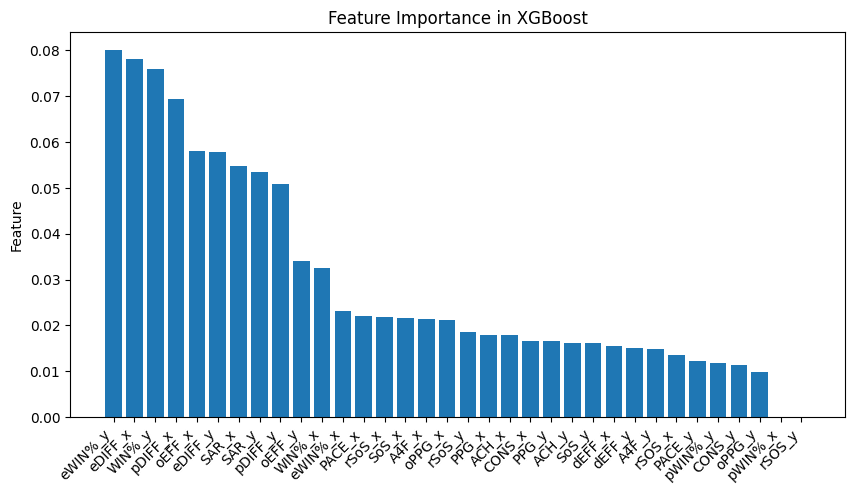

eWIN%_y: 0.0800
eDIFF_x: 0.0782
WIN%_y: 0.0759
pDIFF_x: 0.0694
oEFF_x: 0.0581
eDIFF_y: 0.0579
SAR_x: 0.0547
SAR_y: 0.0534
pDIFF_y: 0.0508
oEFF_y: 0.0340
WIN%_x: 0.0325
eWIN%_x: 0.0231
PACE_x: 0.0220
rSoS_x: 0.0219
SoS_x: 0.0216
A4F_x: 0.0213
oPPG_x: 0.0211
rSoS_y: 0.0186
PPG_x: 0.0179
ACH_x: 0.0179
CONS_x: 0.0166
PPG_y: 0.0165
ACH_y: 0.0162
SoS_y: 0.0161
dEFF_x: 0.0156
dEFF_y: 0.0151
A4F_y: 0.0148
rSOS_x: 0.0136
PACE_y: 0.0123
pWIN%_y: 0.0119
CONS_y: 0.0113
oPPG_y: 0.0098
pWIN%_x: 0.0000
rSOS_y: 0.0000


In [21]:
xgb_importance = xgb_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(xgb_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(xgb_importance)), xgb_importance[sorted_indices], align="center")
plt.xticks(range(len(xgb_importance)), np.array(feature_names)[sorted_indices], rotation=45, ha="right")
plt.ylabel("Feature")
plt.title("Feature Importance in XGBoost")
plt.show()
# Print top features
num_features = min(len(xgb_importance), len(feature_names))
for i in sorted_indices[:num_features]:  # Show top 10 features
    print(f"{feature_names[i]}: {xgb_importance[i]:.4f}")

In [22]:
X_future = future.drop(columns=["Visitor/Neutral", "Home/Neutral", "Date"], errors="ignore")

# Ensure feature names match the training data
X_future = X_future[X_train.columns]

# Predict winners
future["Predicted_Winner"] = xgb_model.predict(X_future)
future = future[["Predicted_Winner"] + [col for col in future.columns if col != "Predicted_Winner"]]
# Show Predictions
# 0: Home, 1: Visitor
future

,Predicted_Winner,Date,Visitor/Neutral,Home/Neutral,PPG_x,oPPG_x,pDIFF_x,PACE_x,oEFF_x,dEFF_x,...,SoS_y,rSoS_y,SAR_y,CONS_y,A4F_y,WIN%_y,eWIN%_y,pWIN%_y,ACH_y,rSOS_y
0,0,"Sat, Mar 1, 2025",Washington Wizards,Charlotte Hornets,-0.541667,1.000000,-1.000000,0.368421,-1.000000,0.875969,...,-0.220339,1.06,-0.840593,-0.737705,-1.000000,-0.842349,-0.714715,-0.618818,-0.623529,0.418308
1,0,"Sat, Mar 1, 2025",Brooklyn Nets,Detroit Pistons,-0.916667,-0.258278,-0.531746,-1.000000,-0.768293,0.302326,...,-0.313559,0.29,-0.026877,-0.672131,0.712418,0.146832,0.081081,0.095296,0.023529,0.239861
2,0,"Sat, Mar 1, 2025",Sacramento Kings,Houston Rockets,0.333333,0.271523,0.103175,-0.210526,0.195122,0.271318,...,-0.084746,0.23,0.254866,-1.000000,-0.294118,0.332303,0.330330,0.285887,-0.247059,0.225956
3,0,"Sat, Mar 1, 2025",San Antonio Spurs,Memphis Grizzlies,-0.052083,0.271523,-0.190476,-0.131579,-0.170732,0.348837,...,-0.466102,1.60,0.393883,0.016393,0.320261,0.381762,0.435435,0.500603,-0.470588,0.543453
4,0,"Sat, Mar 1, 2025",Milwaukee Bucks,Dallas Mavericks,0.083333,-0.099338,0.134921,-0.078947,-0.024390,-0.085271,...,-0.377119,0.42,-0.012975,-0.245902,-0.411765,0.047913,0.093093,0.112183,-0.400000,0.269988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0,"Sun, Apr 13, 2025",Utah Jazz,Minnesota Timberwolves,-0.125000,0.827815,-0.579365,-0.210526,-0.268293,1.000000,...,0.182203,-2.20,0.248378,-0.803279,0.307190,0.069552,0.249249,0.230398,-0.929412,-0.337196
339,1,"Sun, Apr 13, 2025",Oklahoma City Thunder,New Orleans Pelicans,0.604167,-0.880795,1.000000,-0.078947,0.585366,-1.000000,...,0.652542,0.90,-0.649676,-0.606557,-0.830065,-0.712519,-0.693694,-0.628468,-0.211765,0.381228
340,1,"Sun, Apr 13, 2025",Los Angeles Lakers,Portland Trail Blazers,-0.093750,-0.284768,0.111111,-0.578947,0.048780,0.038760,...,0.461864,0.84,-0.339203,1.000000,0.882353,-0.205564,-0.294294,-0.324487,0.152941,0.367323
341,0,"Sun, Apr 13, 2025",Phoenix Suns,Sacramento Kings,0.020833,0.350993,-0.182540,-0.631579,0.109756,0.720930,...,-0.508475,1.70,-0.060241,0.180328,-0.725490,0.047913,0.066066,0.102533,-0.294118,0.566628


In [23]:
final_df = pd.DataFrame()
final_df['Date'] = future['Date']
final_df['Visitor/Neutral'] = future['Visitor/Neutral']
final_df['Home/Neutral'] = future['Home/Neutral']
final_df['XGBoost_ADV'] = future['Predicted_Winner']

# SVM With Advanced Stats

In [24]:
features = ['PPG_x', 'oPPG_x', 'pDIFF_x', 'PACE_x', 'oEFF_x', 'dEFF_x', 'eDIFF_x', 'SoS_x', 'rSOS_x', 'SAR_x', 'CONS_x', 'A4F_x', 'WIN%_x', 'eWIN%_x', 'pWIN%_x', 'ACH_x',
            'PPG_y', 'oPPG_y', 'pDIFF_y', 'PACE_y', 'oEFF_y', 'dEFF_y', 'eDIFF_y', 'SoS_y', 'rSOS_y', 'SAR_y', 'CONS_y', 'A4F_y', 'WIN%_y', 'eWIN%_y', 'pWIN%_y', 'ACH_y']

X = merged[features]
y = merged['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train the SVM Model
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)

# Step 4: Make Predictions
predictions = model.predict(X_test_scaled)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, predictions))

Accuracy: 0.6629
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       102
           1       0.61      0.57      0.59        76

    accuracy                           0.66       178
   macro avg       0.65      0.65      0.65       178
weighted avg       0.66      0.66      0.66       178



In [25]:
X_future = future[features]  # Extract only relevant columns

# Standardize using the same scaler
X_future_scaled = scaler.transform(X_future)

# Make Predictions
future['Predicted_Winner'] = model.predict(X_future_scaled)
future # 0: Home, 1: Visitor

,Predicted_Winner,Date,Visitor/Neutral,Home/Neutral,PPG_x,oPPG_x,pDIFF_x,PACE_x,oEFF_x,dEFF_x,...,SoS_y,rSoS_y,SAR_y,CONS_y,A4F_y,WIN%_y,eWIN%_y,pWIN%_y,ACH_y,rSOS_y
0,0,"Sat, Mar 1, 2025",Washington Wizards,Charlotte Hornets,-0.541667,1.000000,-1.000000,0.368421,-1.000000,0.875969,...,-0.220339,1.06,-0.840593,-0.737705,-1.000000,-0.842349,-0.714715,-0.618818,-0.623529,0.418308
1,0,"Sat, Mar 1, 2025",Brooklyn Nets,Detroit Pistons,-0.916667,-0.258278,-0.531746,-1.000000,-0.768293,0.302326,...,-0.313559,0.29,-0.026877,-0.672131,0.712418,0.146832,0.081081,0.095296,0.023529,0.239861
2,0,"Sat, Mar 1, 2025",Sacramento Kings,Houston Rockets,0.333333,0.271523,0.103175,-0.210526,0.195122,0.271318,...,-0.084746,0.23,0.254866,-1.000000,-0.294118,0.332303,0.330330,0.285887,-0.247059,0.225956
3,0,"Sat, Mar 1, 2025",San Antonio Spurs,Memphis Grizzlies,-0.052083,0.271523,-0.190476,-0.131579,-0.170732,0.348837,...,-0.466102,1.60,0.393883,0.016393,0.320261,0.381762,0.435435,0.500603,-0.470588,0.543453
4,0,"Sat, Mar 1, 2025",Milwaukee Bucks,Dallas Mavericks,0.083333,-0.099338,0.134921,-0.078947,-0.024390,-0.085271,...,-0.377119,0.42,-0.012975,-0.245902,-0.411765,0.047913,0.093093,0.112183,-0.400000,0.269988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0,"Sun, Apr 13, 2025",Utah Jazz,Minnesota Timberwolves,-0.125000,0.827815,-0.579365,-0.210526,-0.268293,1.000000,...,0.182203,-2.20,0.248378,-0.803279,0.307190,0.069552,0.249249,0.230398,-0.929412,-0.337196
339,1,"Sun, Apr 13, 2025",Oklahoma City Thunder,New Orleans Pelicans,0.604167,-0.880795,1.000000,-0.078947,0.585366,-1.000000,...,0.652542,0.90,-0.649676,-0.606557,-0.830065,-0.712519,-0.693694,-0.628468,-0.211765,0.381228
340,1,"Sun, Apr 13, 2025",Los Angeles Lakers,Portland Trail Blazers,-0.093750,-0.284768,0.111111,-0.578947,0.048780,0.038760,...,0.461864,0.84,-0.339203,1.000000,0.882353,-0.205564,-0.294294,-0.324487,0.152941,0.367323
341,0,"Sun, Apr 13, 2025",Phoenix Suns,Sacramento Kings,0.020833,0.350993,-0.182540,-0.631579,0.109756,0.720930,...,-0.508475,1.70,-0.060241,0.180328,-0.725490,0.047913,0.066066,0.102533,-0.294118,0.566628


In [26]:
final_df['SVM_ADV'] = future['Predicted_Winner']

# **BASIC STAT MODELS**

In [27]:
past_matches = pd.concat([df_schedule_Oct, df_schedule_Nov, df_schedule_Dec, df_schedule_Jan, df_schedule_FebPast])

merged = past_matches.merge(df_2025, how="left", left_on="Visitor/Neutral", right_on="Team")
# Change old names to either Visitor of Home
merged = merged.rename(columns={
        "MOV/A": "VMOV/A",
        "ORtg/A": "VORtg/A",
        "DRtg/A": "VDRtg/A",
        "NRtg/A": "VNRtg/A",
        "W/L%": "VW/L%"
    })

merged = merged.merge(df_2025, how="left", left_on="Home/Neutral", right_on="Team")
merged = merged.rename(columns={
        "MOV/A": "HMOV/A",
        "ORtg/A": "HORtg/A",
        "DRtg/A": "HDRtg/A",
        "NRtg/A": "HNRtg/A",
        "W/L%": "HW/L%"
    })

merged = merged.drop(columns = ['Team_x', 'Team_y', 'PTS', 'PTS.1'])
merged

,Date,Visitor/Neutral,Home/Neutral,Winner,VW/L%,VMOV/A,VORtg/A,VDRtg/A,VNRtg/A,HW/L%,HMOV/A,HORtg/A,HDRtg/A,HNRtg/A
0,"Tue, Oct 22, 2024",New York Knicks,Boston Celtics,0,0.667,0.297748,0.608260,0.429975,0.296703,0.705,0.657214,0.624531,-0.310401,0.688926
1,"Tue, Oct 22, 2024",Minnesota Timberwolves,Los Angeles Lakers,0,0.532,0.306088,0.010013,-0.385749,0.313609,0.644,0.089241,0.010013,0.054873,0.086221
2,"Wed, Oct 23, 2024",Indiana Pacers,Detroit Pistons,1,0.576,0.020851,0.166458,0.387387,0.020287,0.557,0.046706,-0.146433,-0.066339,0.043111
3,"Wed, Oct 23, 2024",Brooklyn Nets,Atlanta Hawks,0,0.350,-0.564637,-0.809762,0.289107,-0.587489,0.450,-0.261885,-0.337922,0.254709,-0.252747
4,"Wed, Oct 23, 2024",Orlando Magic,Miami Heat,1,0.468,-0.215179,-0.949937,-0.590500,-0.229079,0.475,-0.107590,-0.261577,0.099099,-0.120034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,"Fri, Feb 28, 2025",New York Knicks,Memphis Grizzlies,1,0.667,0.297748,0.608260,0.429975,0.296703,0.633,0.466222,0.406758,-0.113841,0.442096
884,"Fri, Feb 28, 2025",Indiana Pacers,Miami Heat,0,0.576,0.020851,0.166458,0.387387,0.020287,0.475,-0.107590,-0.261577,0.099099,-0.120034
885,"Fri, Feb 28, 2025",New Orleans Pelicans,Phoenix Suns,0,0.279,-0.621351,-0.525657,0.787060,-0.653423,0.459,-0.253545,0.083855,0.837838,-0.267963
886,"Fri, Feb 28, 2025",Minnesota Timberwolves,Utah Jazz,0,0.532,0.306088,0.010013,-0.385749,0.313609,0.250,-0.561301,-0.266583,1.000000,-0.587489


In [28]:
future_matches = pd.concat([df_schedule_FebNA, df_schedule_Mar, df_schedule_Apr])
future = future_matches.merge(df_2025, how="left", left_on="Visitor/Neutral", right_on="Team")

# Change old names to either Visitor or Home
future = future.rename(columns={
        "MOV/A": "VMOV/A",
        "ORtg/A": "VORtg/A",
        "DRtg/A": "VDRtg/A",
        "NRtg/A": "VNRtg/A",
        "W/L%": "VW/L%"
    })

future = future.merge(df_2025, how="left", left_on="Home/Neutral", right_on="Team")
future = future.rename(columns={
        "MOV/A": "HMOV/A",
        "ORtg/A": "HORtg/A",
        "DRtg/A": "HDRtg/A",
        "NRtg/A": "HNRtg/A",
        "W/L%": "HW/L%"
    })

future = future.drop(columns = ['Team_x', 'Team_y', 'PTS', 'PTS.1'])
future

,Date,Visitor/Neutral,Home/Neutral,VW/L%,VMOV/A,VORtg/A,VDRtg/A,VNRtg/A,HW/L%,HMOV/A,HORtg/A,HDRtg/A,HNRtg/A
0,"Sat, Mar 1, 2025",Washington Wizards,Charlotte Hornets,0.186,-1.000000,-0.996245,0.844390,-1.000000,0.237,-0.700584,-1.000000,0.310401,-0.727811
1,"Sat, Mar 1, 2025",Brooklyn Nets,Detroit Pistons,0.350,-0.564637,-0.809762,0.289107,-0.587489,0.557,0.046706,-0.146433,-0.066339,0.043111
2,"Sat, Mar 1, 2025",Sacramento Kings,Houston Rockets,0.525,0.051710,0.172716,0.346437,0.045647,0.617,0.343620,-0.133917,-0.590500,0.322063
3,"Sat, Mar 1, 2025",San Antonio Spurs,Memphis Grizzlies,0.424,-0.194329,-0.183980,0.349713,-0.196957,0.633,0.466222,0.406758,-0.113841,0.442096
4,"Sat, Mar 1, 2025",Milwaukee Bucks,Dallas Mavericks,0.576,0.055046,-0.046308,0.045045,0.053254,0.525,0.142619,0.135169,0.110565,0.142012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,"Sun, Apr 13, 2025",Utah Jazz,Minnesota Timberwolves,0.250,-0.561301,-0.266583,1.000000,-0.587489,0.532,0.306088,0.010013,-0.385749,0.313609
339,"Sun, Apr 13, 2025",Oklahoma City Thunder,New Orleans Pelicans,0.817,1.000000,0.555695,-1.000000,1.000000,0.279,-0.621351,-0.525657,0.787060,-0.653423
340,"Sun, Apr 13, 2025",Los Angeles Lakers,Portland Trail Blazers,0.644,0.089241,0.010013,0.054873,0.086221,0.443,-0.344454,-0.400501,0.341523,-0.338969
341,"Sun, Apr 13, 2025",Phoenix Suns,Sacramento Kings,0.459,-0.253545,0.083855,0.837838,-0.267963,0.525,0.051710,0.172716,0.346437,0.045647


# XGBoost with Basic Stats

In [29]:
'''
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
'''

'\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'max_depth\': [3, 5, 7],\n    \'subsample\': [0.7, 0.8, 0.9]\n}\n\ngrid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(X_train, y_train)\n\nprint("Best Parameters:", grid_search.best_params_)\n'

In [30]:
X = merged.drop(columns=['Winner', 'Visitor/Neutral', 'Home/Neutral', 'Date'])  # Features
y = merged['Winner']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:

xgb_model = XGBClassifier(
    n_estimators=200,   # Number of trees
    learning_rate=0.01,  # Step size shrinkage (how much each tree contributes)
    max_depth=3,        # Depth of each tree (controls overfitting)
    subsample=0.7,      # Randomly sample 80% of data (prevents overfitting)
    colsample_bytree=0.8,  # Select 80% of features for each tree
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

XGBoost Model Accuracy: 0.6742
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       102
           1       0.62      0.62      0.62        76

    accuracy                           0.67       178
   macro avg       0.67      0.67      0.67       178
weighted avg       0.67      0.67      0.67       178



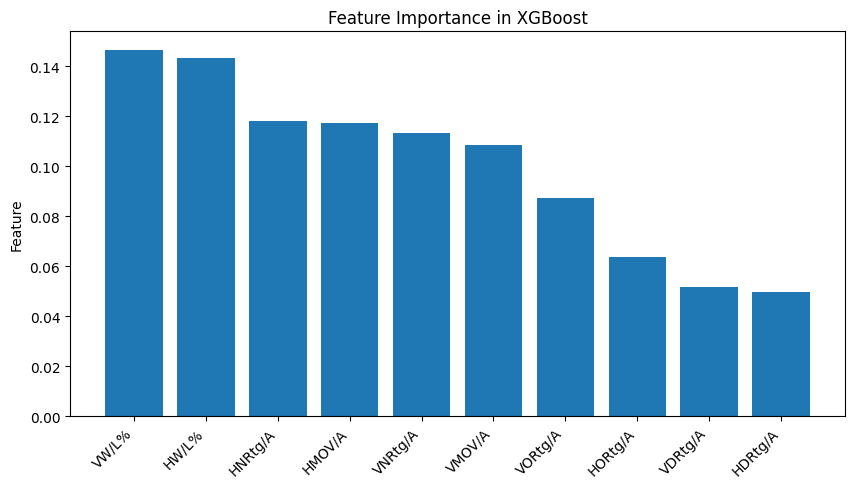

VW/L%: 0.1466
HW/L%: 0.1431
HNRtg/A: 0.1183
HMOV/A: 0.1174
VNRtg/A: 0.1133
VMOV/A: 0.1086
VORtg/A: 0.0873
HORtg/A: 0.0639
VDRtg/A: 0.0519
HDRtg/A: 0.0497


In [32]:
xgb_importance = xgb_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(xgb_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(xgb_importance)), xgb_importance[sorted_indices], align="center")
plt.xticks(range(len(xgb_importance)), np.array(feature_names)[sorted_indices], rotation=45, ha="right")
plt.ylabel("Feature")
plt.title("Feature Importance in XGBoost")
plt.show()

# Print top features
num_features = min(len(xgb_importance), len(feature_names))
for i in sorted_indices[:10]:  # Show top 10 features
    print(f"{feature_names[i]}: {xgb_importance[i]:.4f}")

In [33]:
XGBoost_BAS_future = future.copy()
X_future = XGBoost_BAS_future.drop(columns=["Visitor/Neutral", "Home/Neutral", "Date"], errors="ignore")

# Ensure feature names match the training data
X_future = X_future[X_train.columns]

# Predict winners
XGBoost_BAS_future["Predicted_Winner"] = xgb_model.predict(X_future)
XGBoost_BAS_future = XGBoost_BAS_future[["Predicted_Winner"] + [col for col in XGBoost_BAS_future.columns if col != "Predicted_Winner"]]
# Show Predictions
# 0: Home, 1: Visitor
XGBoost_BAS_future

,Predicted_Winner,Date,Visitor/Neutral,Home/Neutral,VW/L%,VMOV/A,VORtg/A,VDRtg/A,VNRtg/A,HW/L%,HMOV/A,HORtg/A,HDRtg/A,HNRtg/A
0,0,"Sat, Mar 1, 2025",Washington Wizards,Charlotte Hornets,0.186,-1.000000,-0.996245,0.844390,-1.000000,0.237,-0.700584,-1.000000,0.310401,-0.727811
1,0,"Sat, Mar 1, 2025",Brooklyn Nets,Detroit Pistons,0.350,-0.564637,-0.809762,0.289107,-0.587489,0.557,0.046706,-0.146433,-0.066339,0.043111
2,0,"Sat, Mar 1, 2025",Sacramento Kings,Houston Rockets,0.525,0.051710,0.172716,0.346437,0.045647,0.617,0.343620,-0.133917,-0.590500,0.322063
3,0,"Sat, Mar 1, 2025",San Antonio Spurs,Memphis Grizzlies,0.424,-0.194329,-0.183980,0.349713,-0.196957,0.633,0.466222,0.406758,-0.113841,0.442096
4,0,"Sat, Mar 1, 2025",Milwaukee Bucks,Dallas Mavericks,0.576,0.055046,-0.046308,0.045045,0.053254,0.525,0.142619,0.135169,0.110565,0.142012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0,"Sun, Apr 13, 2025",Utah Jazz,Minnesota Timberwolves,0.250,-0.561301,-0.266583,1.000000,-0.587489,0.532,0.306088,0.010013,-0.385749,0.313609
339,1,"Sun, Apr 13, 2025",Oklahoma City Thunder,New Orleans Pelicans,0.817,1.000000,0.555695,-1.000000,1.000000,0.279,-0.621351,-0.525657,0.787060,-0.653423
340,1,"Sun, Apr 13, 2025",Los Angeles Lakers,Portland Trail Blazers,0.644,0.089241,0.010013,0.054873,0.086221,0.443,-0.344454,-0.400501,0.341523,-0.338969
341,0,"Sun, Apr 13, 2025",Phoenix Suns,Sacramento Kings,0.459,-0.253545,0.083855,0.837838,-0.267963,0.525,0.051710,0.172716,0.346437,0.045647


In [34]:
final_df['XGBoost_BAS'] = XGBoost_BAS_future['Predicted_Winner']

# SVM with Basic Stats

In [35]:
features = ['VMOV/A', 'VORtg/A', 'VDRtg/A', 'VNRtg/A',
            'HMOV/A', 'HORtg/A', 'HDRtg/A', 'HNRtg/A']
X = merged[features]
y = merged['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train the SVM Model
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)

# Step 4: Make Predictions
predictions = model.predict(X_test_scaled)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, predictions))

Accuracy: 0.6854
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       102
           1       0.64      0.59      0.62        76

    accuracy                           0.69       178
   macro avg       0.68      0.67      0.67       178
weighted avg       0.68      0.69      0.68       178



In [36]:
SVM_BAS_future = future.copy()
X_future = SVM_BAS_future[features]  # Extract only relevant columns

# Standardize using the same scaler
X_future_scaled = scaler.transform(X_future)

# Make Predictions

SVM_BAS_future['Predicted_Winner'] = model.predict(X_future_scaled)
SVM_BAS_future = SVM_BAS_future[["Predicted_Winner"] + [col for col in SVM_BAS_future.columns if col != "Predicted_Winner"]]
SVM_BAS_future # 0: Home, 1: Visitor

,Predicted_Winner,Date,Visitor/Neutral,Home/Neutral,VW/L%,VMOV/A,VORtg/A,VDRtg/A,VNRtg/A,HW/L%,HMOV/A,HORtg/A,HDRtg/A,HNRtg/A
0,0,"Sat, Mar 1, 2025",Washington Wizards,Charlotte Hornets,0.186,-1.000000,-0.996245,0.844390,-1.000000,0.237,-0.700584,-1.000000,0.310401,-0.727811
1,0,"Sat, Mar 1, 2025",Brooklyn Nets,Detroit Pistons,0.350,-0.564637,-0.809762,0.289107,-0.587489,0.557,0.046706,-0.146433,-0.066339,0.043111
2,0,"Sat, Mar 1, 2025",Sacramento Kings,Houston Rockets,0.525,0.051710,0.172716,0.346437,0.045647,0.617,0.343620,-0.133917,-0.590500,0.322063
3,0,"Sat, Mar 1, 2025",San Antonio Spurs,Memphis Grizzlies,0.424,-0.194329,-0.183980,0.349713,-0.196957,0.633,0.466222,0.406758,-0.113841,0.442096
4,0,"Sat, Mar 1, 2025",Milwaukee Bucks,Dallas Mavericks,0.576,0.055046,-0.046308,0.045045,0.053254,0.525,0.142619,0.135169,0.110565,0.142012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0,"Sun, Apr 13, 2025",Utah Jazz,Minnesota Timberwolves,0.250,-0.561301,-0.266583,1.000000,-0.587489,0.532,0.306088,0.010013,-0.385749,0.313609
339,1,"Sun, Apr 13, 2025",Oklahoma City Thunder,New Orleans Pelicans,0.817,1.000000,0.555695,-1.000000,1.000000,0.279,-0.621351,-0.525657,0.787060,-0.653423
340,1,"Sun, Apr 13, 2025",Los Angeles Lakers,Portland Trail Blazers,0.644,0.089241,0.010013,0.054873,0.086221,0.443,-0.344454,-0.400501,0.341523,-0.338969
341,0,"Sun, Apr 13, 2025",Phoenix Suns,Sacramento Kings,0.459,-0.253545,0.083855,0.837838,-0.267963,0.525,0.051710,0.172716,0.346437,0.045647


In [37]:
final_df['SVM_BAS'] = SVM_BAS_future['Predicted_Winner']

In [38]:
final_df
# 0: Home
# 1: Visitor

,Date,Visitor/Neutral,Home/Neutral,XGBoost_ADV,SVM_ADV,XGBoost_BAS,SVM_BAS
0,"Sat, Mar 1, 2025",Washington Wizards,Charlotte Hornets,0,0,0,0
1,"Sat, Mar 1, 2025",Brooklyn Nets,Detroit Pistons,0,0,0,0
2,"Sat, Mar 1, 2025",Sacramento Kings,Houston Rockets,0,0,0,0
3,"Sat, Mar 1, 2025",San Antonio Spurs,Memphis Grizzlies,0,0,0,0
4,"Sat, Mar 1, 2025",Milwaukee Bucks,Dallas Mavericks,0,0,0,0
...,...,...,...,...,...,...,...
338,"Sun, Apr 13, 2025",Utah Jazz,Minnesota Timberwolves,0,0,0,0
339,"Sun, Apr 13, 2025",Oklahoma City Thunder,New Orleans Pelicans,1,1,1,1
340,"Sun, Apr 13, 2025",Los Angeles Lakers,Portland Trail Blazers,1,1,1,1
341,"Sun, Apr 13, 2025",Phoenix Suns,Sacramento Kings,0,0,0,0
